In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm

   user_id  click group            timestamp
0        1      1   exp  2024-01-01 00:00:00
1        2      0   exp  2024-01-01 00:01:00
2        3      1   exp  2024-01-01 00:02:00
3        4      0   exp  2024-01-01 00:03:00
4        5      1   exp  2024-01-01 00:04:00
            user_id         click
count  20000.000000  20000.000000
mean   10000.500000      0.405250
std     5773.647028      0.490953
min        1.000000      0.000000
25%     5000.750000      0.000000
50%    10000.500000      0.000000
75%    15000.250000      1.000000
max    20000.000000      1.000000
group
con    1989
exp    6116
Name: click, dtype: int64


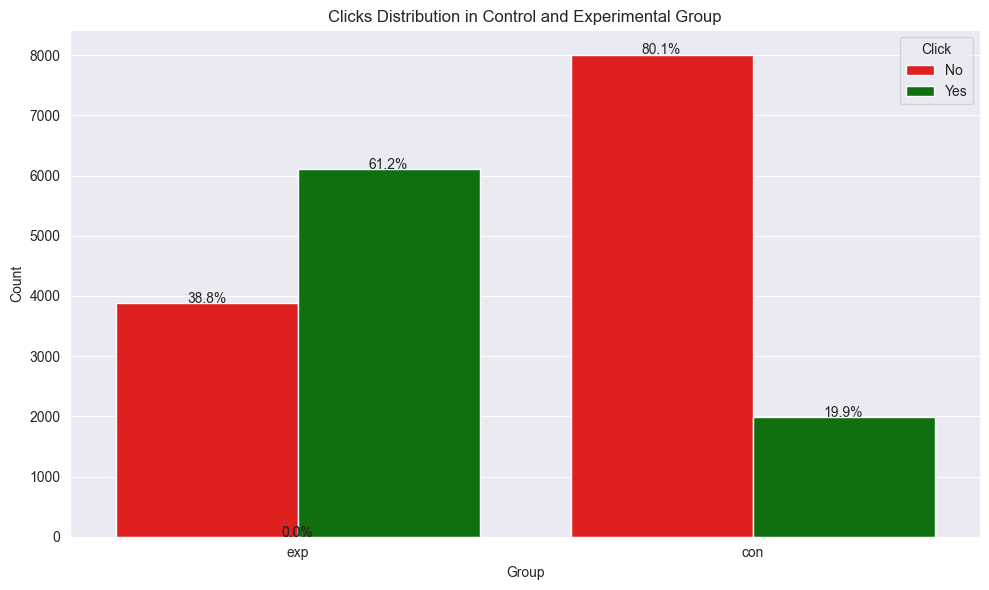

In [29]:
df_ab_test = pd.read_csv("../data/ab_test_click_data.csv")
print(df_ab_test.head())
print(df_ab_test.describe())
print(df_ab_test.groupby("group")["click"].sum())

palette = {0: "red", 1: "green"}
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="group", hue="click", data=df_ab_test, palette=palette)
plt.legend(title="Click", labels=["No", "Yes"])
plt.title("Clicks Distribution in Control and Experimental Group")
plt.xlabel("Group")
plt.ylabel("Count")

group_counts = df_ab_test.groupby(["group"]).size()
group_click_counts = df_ab_test.groupby(["group", "click"]).size().reset_index(name="count")

for i in ax.patches:
    height = i.get_height()

    group = 'exp' if i.get_x() == 0.0 else 'con'
    click = 'yes' if i.get_x() == 0.0 else 'no'
    total = group_counts.loc[group]
    percentage = 100 * height / total
    # Show text on graph displaying percentages
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.5, f"{percentage:.1f}%", ha="center")

plt.tight_layout()
plt.show()

In [30]:
alpha = 0.05
print("Alpha: Significance Level: ", alpha)

delta = 0.1
print("Delta: Minimum Detectable Effect: ", delta)

Alpha: Significance Level:  0.05
Delta: Minimum Detectable Effect:  0.1


In [31]:
# Total number of clicks in each group
X_exp = df_ab_test.groupby("group")["click"].sum().loc["exp"]
X_con = df_ab_test.groupby("group")["click"].sum().loc["con"]

# Number of users in each group
N_exp = df_ab_test[df_ab_test["group"] == "exp"].shape[0]
N_con = df_ab_test[df_ab_test["group"] == "con"].shape[0]

# Outputting the total number of clicks in each group
print("Total Clicks in Experimental Group: ", X_exp)
print("Total Clicks in Control Group: ", X_con)

# Outputting the number of users in each group
print("Total Users in Experimental Group: ", N_exp)
print("Total Users in Control Group: ", N_con)


Total Clicks in Experimental Group:  6116
Total Clicks in Control Group:  1989
Total Users in Experimental Group:  10000
Total Users in Control Group:  10000


In [32]:
p_exp_hat = X_exp / N_exp
p_con_hat = X_con / N_con

# Outputting the click probability in each group
print("Click Probability in Experimental Group: ", p_exp_hat)
print("Click Probability in Control Group: ", p_con_hat)

p_pooled_hat = (X_exp + X_con) / (N_exp + N_con)

# Outputting the pooled click probability
print("Pooled Click Probability: ", p_pooled_hat)

Click Probability in Experimental Group:  0.6116
Click Probability in Control Group:  0.1989
Pooled Click Probability:  0.40525


# Calculating pooled variance   

In [33]:
pooled_variance = p_pooled_hat * (1 - p_pooled_hat) * (1 / N_exp + 1 / N_con)
print("P^_pooled: ", p_pooled_hat)
print("Pooled Variances: ", pooled_variance)

P^_pooled:  0.40525
Pooled Variances:  4.82044875e-05


## Calculating the standard error

In [40]:
SE = np.sqrt(pooled_variance)

#Outputting standard error
print("Standard Error: ", SE)

# Computing the test statistic of the two-sample z-test
test_stat = (p_con_hat - p_exp_hat) / SE
# Outputting the test statistic
print("Test Statistic for the two sample Z test is: ", test_stat)

# Calculating the critical Z value
z_critical = norm.ppf(1 - alpha / 2)
print("Critical Z Value: ", z_critical)

Standard Error:  0.006942945160376826
Test Statistic for the two sample Z test is:  -59.44163326469381
Critical Z Value:  1.959963984540054


## Calculating p_values of the Z-test

    -  A low p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.
    -  A high p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.
    -  p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). Always report the p-value so your readers can draw their own conclusions.

In [42]:
p_value  = 2 * norm.sf(np.abs(test_stat))

# Checking statistical significance
def check_statistical_significance(p_value, alpha):
    print("P-Value of the 2 sample Z test is: ", round(p_value, 3))
    if p_value <= alpha:
        print("Reject the null hypothesis: There is a statistically significant difference between the two proportions, and it is not by chance")
    else:
        print("Fail to reject the null hypothesis: There is no statistically significant difference between the two proportions, and it is by chance")
        
check_statistical_significance(p_value, alpha)

P-Value of the 2 sample Z test is:  0.0
Reject the null hypothesis


In [ ]:
mu = 0
singm